# Melanoma Detection

## Problem Statement:
Build a `CNN model` to accurately detect `Melanoma`. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

## Data Description:
The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


The data set contains the following diseases:

    Actinic keratosis
    Basal cell carcinoma
    Dermatofibroma
    Melanoma
    Nevus
    Pigmented benign keratosis
    Seborrheic keratosis
    Squamous cell carcinoma
    Vascular lesion

## Approach

### Step 1: `EDA` [Data Reading/Data Understanding]
- Loading the data into Google Drive & Local machine
- Defining the path for train and test images 
- Dataset visualisation [nine classes present in the dataset]
- Verification of the data [image size/resolution]

### Step 2: Data preparation
#### Verify `Class imbalance`
- Class with least number of samples
- Classes that have dominant data interms of samples

### Step 2: Dataset Creation
- `Split train & validation` dataset from the `train` directory with a batch size of 32. 
- Resize the images to 180*180.
    
### Step 3: Model Building & training
- CNN model creation to accurately detect 9 classes present in the dataset. 
    - `Rescale` images to normalize pixel values between (0,1).
    - Select appropriate `optimiser` and `loss function` for model training
    - Model Training with `~20 epochs`
    #### Inference
        
### Step 4: Data `Augmentation`
- Resolve `underfitting/overfitting`

### Step 5: Rebuild Model & Train on Augmented data
- CNN model creation to accurately detect 9 classes present in the dataset. 
    - Rescale images to normalize pixel values between (0,1).
    - Select appropriate optimiser and loss function for model training
    - Model Training with ~30 epochs
    #### Inference

### Step 6: Model `Evaluation & Conclusion`

#### Importing the needed Liberaries

In [1]:
#Importing the needed Liberaries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers

from keras import Sequential
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import seaborn as sns

### Step 1: `EDA` [Data Reading/Data Understanding]
- Loading the data from Google Drive or Local machine
- Defining the path for train and test images 
- Dataset visualisation [nine classes present in the dataset]
- Verification of the data [image size/resolution]

In [2]:
# Branch the data set loading based on Local machine or Colab
colab = 'YES'
#colab = 'NO'

In [3]:
# Based on the flag load the data from the appropriate location
if colab == 'YES':
    ## Mount the google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    # Defining the path for train and test images
    data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN_Melanoma/Train")
    data_dir_test = pathlib.Path('/content/gdrive/MyDrive/CNN_Melanoma/Test')
else:
    # Defining the path for train and test images
    data_dir_train = pathlib.Path(r"C:\Users\xxxx\Documents\xxxx\DeepLearning\CNN\Melanoma_Detection\Train")
    data_dir_test = pathlib.Path(r"C:\Users\xxxx\Documents\xxxx\DeepLearning\CNN\Melanoma_Detection\Test")

Mounted at /content/gdrive


In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Train Images:", image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test Images:", image_count_test)
print("Total Images:", image_count_train+image_count_test)

Train Images: 2239
Test Images: 118
Total Images: 2357


#### Inference: 
- The count of images from the problem statement and the loaded data are matching. No data upload issues

#### Dataset visualisation [nine classes present in the dataset]

Found 2239 files belonging to 9 classes.


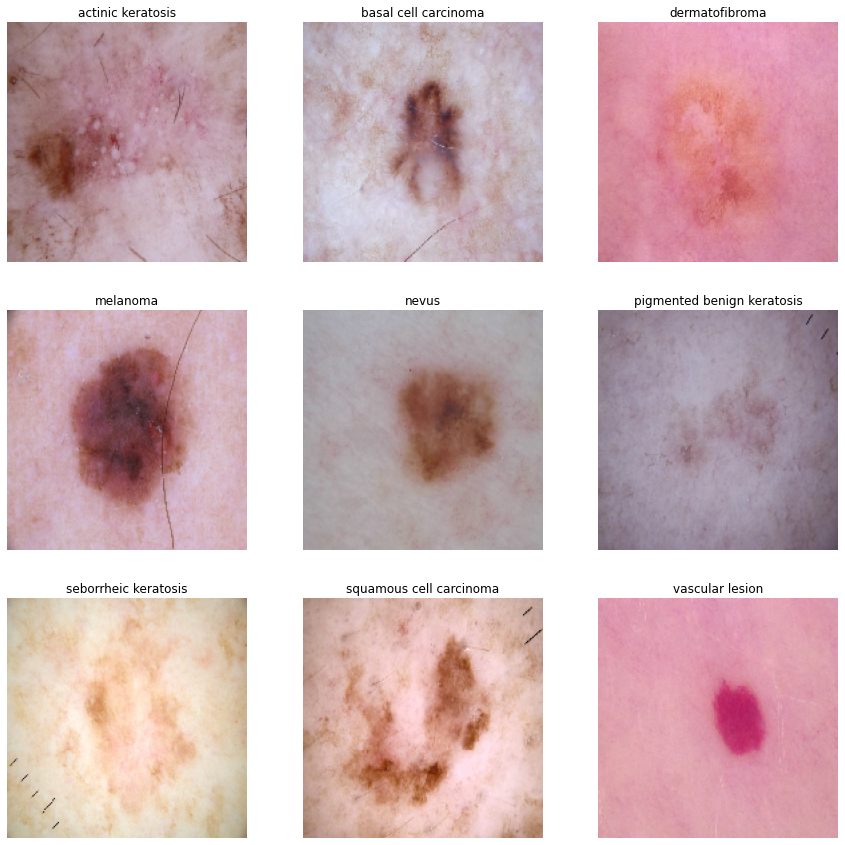

In [5]:
#image_dataset_from_directory() will return a tf.data.Dataset that yields batches of images from the subdirectories.
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,
                                                                    image_size=(180,180), 
                                                                    label_mode='categorical', seed=123)

#all the classes of Skin Cancer
class_names = image_dataset.class_names

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))
    
#Visualize image 
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

In [6]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [7]:
def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'Images'])

In [8]:
train_class = class_distribution_count(data_dir_train)
train_class

,Class,Images
0,actinic keratosis,114
1,basal cell carcinoma,376
2,pigmented benign keratosis,462
3,dermatofibroma,95
4,squamous cell carcinoma,181
5,melanoma,438
6,vascular lesion,139
7,seborrheic keratosis,77
8,nevus,357


In [9]:
test_class = class_distribution_count(data_dir_test)
test_class

,Class,Images
0,melanoma,16
1,squamous cell carcinoma,16
2,vascular lesion,3
3,pigmented benign keratosis,16
4,dermatofibroma,16
5,basal cell carcinoma,16
6,seborrheic keratosis,3
7,nevus,16
8,actinic keratosis,16


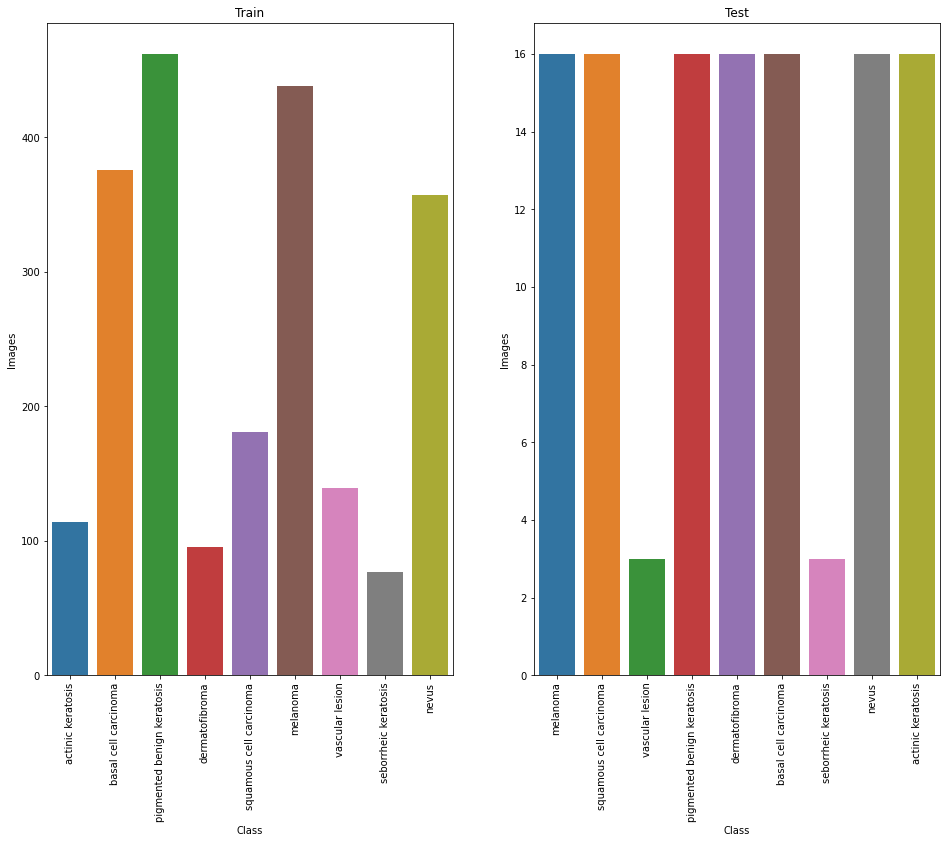

In [10]:
#Visualize the Number of image in each class.
plt.figure(figsize=(16, 12))
plt.subplot(1,2,1)
ax = sns.barplot(y = "Images", x = "Class", data = train_class)
ax.set_title('Train')
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
ax = sns.barplot(y = "Images", x = "Class", data = test_class)
ax.set_title('Test')
plt.xticks(rotation = 90)
plt.show()

#### Inference: 
In `Train` Set: Below have fewer images with respect to other types
- Actinic keratosis
- Dermatofibroma
- Seborrheic keratosis
- Vascular lesion

In `Test` Set: Below have fewer images with respect to other types
- Seborrheic keratosis
- Vascular lesion

`Pigmented benign keratosis` has the dominant data

The `Target` class `Melanoma` seems to have sufficient train and test data

#### We have class imbalance.

### Data Creation & Model Building

In [11]:
batch_size = 32
img_height = 180
img_width = 180

In [12]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [13]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [14]:
val_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [15]:
train_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [16]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model without Data Augmentation and No Drop out

In [17]:
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer  
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

In [18]:
#Compile the Model

# Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
# SparseCategoricalCrossentropy
model.compile(optimizer = "Adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics = ["accuracy"])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model_0.h5", monitor="val_accuracy", 
                             save_best_only = True, mode = "auto", 
                             verbose = 1)

#Stop training when the needed metric is NOT improving.
earlystop = EarlyStopping(monitor = "val_accuracy", patience = 10,
                          mode = "auto", verbose = 1)

In [19]:
train_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
val_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
# Train the model
epochs = 20
history = model.fit(train_ds, validation_data = val_ds, 
                    epochs = epochs, callbacks = [checkpoint,earlystop])

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


55/56 [============================>.] - ETA: 0s - loss: 2.1269 - accuracy: 0.2153
Epoch 1: val_accuracy improved from -inf to 0.29978, saving model to model_0.h5
56/56 [==============================] - 269s 910ms/step - loss: 2.1209 - accuracy: 0.2176 - val_loss: 1.9303 - val_accuracy: 0.2998
Epoch 2/20
55/56 [============================>.] - ETA: 0s - loss: 1.8116 - accuracy: 0.3307
Epoch 2: val_accuracy improved from 0.29978 to 0.37584, saving model to model_0.h5
56/56 [==============================] - 2s 43ms/step - loss: 1.8102 - accuracy: 0.3315 - val_loss: 1.6782 - val_accuracy: 0.3758
Epoch 3/20
55/56 [============================>.] - ETA: 0s - loss: 1.5938 - accuracy: 0.4216
Epoch 3: val_accuracy improved from 0.37584 to 0.42953, saving model to model_0.h5
56/56 [==============================] - 2s 43ms/step - loss: 1.5933 - accuracy: 0.4208 - val_loss: 1.5529 - val_accuracy: 0.4295
Epoch 4/20
55/56 [============================>.] - ETA: 0s - loss: 1.4769 - accuracy: 0.4

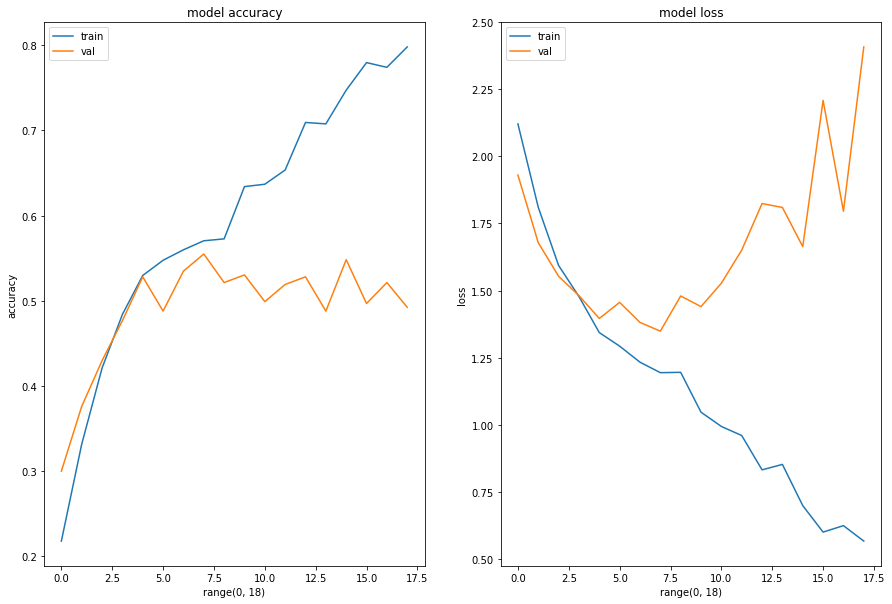

In [22]:
# Plot the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Inference:
- Model is `overfitting`
- Validation accuracy is not improving over the Epochs
- `Loss` is `increasing` in the Validaiton

### Data Augmentation

In [23]:
data_aug = tf.keras.models.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                                          input_shape = (img_height, img_width, 3)),
                            layers.experimental.preprocessing.RandomRotation(0.1),
                            layers.experimental.preprocessing.RandomZoom(0.1)])

### Model with Data Augmentation and Drop out of 20%

In [24]:
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer  
model = Sequential()
model.add(data_aug)
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 20% Fraction of the input units to drop.
model.add(layers.Dropout(0.20))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                  

In [25]:
#Compile the Model

# Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
# SparseCategoricalCrossentropy
model.compile(optimizer = "Adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics = ["accuracy"])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model_1.h5", monitor = "val_accuracy", 
                             save_best_only = True, mode = "auto", 
                             verbose = 1)

#Stop training when the needed metric is NOT improving.
earlystop = EarlyStopping(monitor = "val_accuracy", patience = 10,
                          mode = "auto", verbose = 1)

In [26]:
# Train the model
epochs = 20
history = model.fit(train_ds, validation_data = val_ds, 
                    epochs = epochs, callbacks = [checkpoint,earlystop])

Epoch 1/20
56/56 [==============================] - ETA: 0s - loss: 2.0859 - accuracy: 0.2388
Epoch 1: val_accuracy improved from -inf to 0.23266, saving model to model_1.h5
56/56 [==============================] - 4s 61ms/step - loss: 2.0859 - accuracy: 0.2388 - val_loss: 1.9082 - val_accuracy: 0.2327
Epoch 2/20
56/56 [==============================] - ETA: 0s - loss: 1.7347 - accuracy: 0.3767
Epoch 2: val_accuracy improved from 0.23266 to 0.42282, saving model to model_1.h5
56/56 [==============================] - 3s 59ms/step - loss: 1.7347 - accuracy: 0.3767 - val_loss: 1.6460 - val_accuracy: 0.4228
Epoch 3/20
55/56 [============================>.] - ETA: 0s - loss: 1.6516 - accuracy: 0.4244
Epoch 3: val_accuracy improved from 0.42282 to 0.42506, saving model to model_1.h5
56/56 [==============================] - 3s 59ms/step - loss: 1.6552 - accuracy: 0.4230 - val_loss: 1.6440 - val_accuracy: 0.4251
Epoch 4/20
56/56 [==============================] - ETA: 0s - loss: 1.5422 - accur

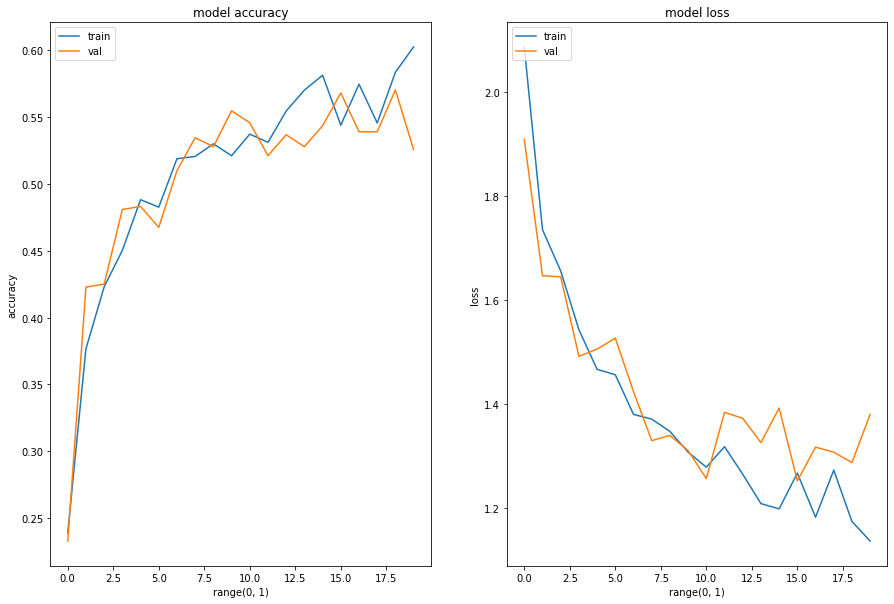

In [27]:
# Plot the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Inference:
- Model seems to be `under fitting`
- Validation accuracy is improving over the Epochs but not significantly
- `Loss` is `decreasing` in the Validation, but still higher compared to the Training 
- `Data Imbalance` shall be handled to improve the accuracy

### Handling Class Imbalance

In [28]:
%pwd

'/content'

In [29]:
pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
path_to_training_dataset= "/content/gdrive/MyDrive/CNN_Melanoma/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  #Adding 500 samples per class to make sure that none of the classes are sparse

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Melanoma/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F8F49A98B20>: 100%|██████████| 500/500 [00:23<00:00, 21.51 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Melanoma/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8F49AB6AC0>: 100%|██████████| 500/500 [00:23<00:00, 21.23 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Melanoma/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8ECAFEC6A0>: 100%|██████████| 500/500 [00:18<00:00, 26.82 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Melanoma/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F8ECD65A040>: 100%|██████████| 500/500 [01:38<00:00,  5.07 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Melanoma/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F8F4B368DF0>: 100%|██████████| 500/500 [01:19<00:00,  6.29 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Melanoma/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8EE643FEB0>: 100%|██████████| 500/500 [00:18<00:00, 27.34 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Melanoma/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F8ECD73F9A0>: 100%|██████████| 500/500 [00:40<00:00, 12.26 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Melanoma/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8F49E039D0>: 100%|██████████| 500/500 [00:18<00:00, 27.02 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_Melanoma/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8ECD79ABE0>: 100%|██████████| 500/500 [00:18<00:00, 27.50 Samples/s]


In [43]:
#Count total number of image generated by Augmentor.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Visualize the Imbalance post Augmentation

### Train and Validation Data split after data augmentation

In [44]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [45]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [46]:
val_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [47]:
train_ds.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

### Inference: Class Imbalance is handled by Augmentation. All classes have equal data

In [48]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model with Data Augmentation and Drop out of 20%

In [49]:
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer  
model = Sequential()
model.add(data_aug)
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 20% Fraction of the input units to drop.
model.add(layers.Dropout(0.20))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                  

In [50]:
#Compile the Model

# Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
# SparseCategoricalCrossentropy
model.compile(optimizer = "Adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
              metrics = ["accuracy"])

#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model_2.h5", monitor="val_accuracy", 
                             save_best_only = True, mode = "auto", 
                             verbose = 1)

#Stop training when the needed metric is NOT improving.
earlystop = EarlyStopping(monitor = "val_accuracy", patience = 10,
                          mode = "auto", verbose = 1)

###  Model Vizualization 

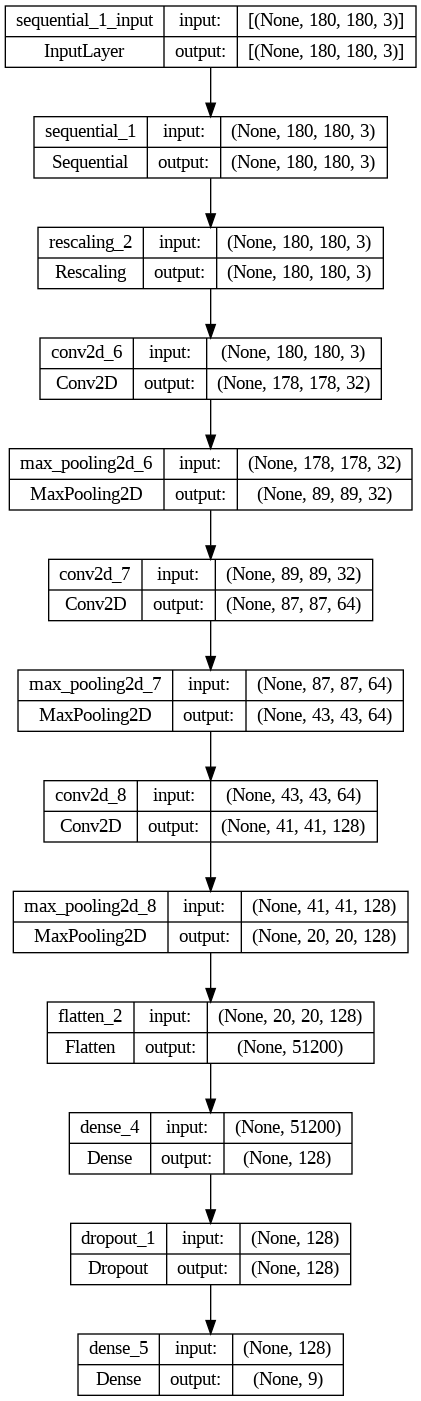

In [51]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = 'CNN_Model.png', show_shapes = True, show_layer_names = True)

### Model Training with 30 Epochs

In [52]:
# Train the model
epochs = 30
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[checkpoint,earlystop])

Epoch 1/30


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - ETA: 0s - loss: 1.9792 - accuracy: 0.2415
Epoch 1: val_accuracy improved from -inf to 0.39198, saving model to model_2.h5
169/169 [==============================] - 40s 95ms/step - loss: 1.9792 - accuracy: 0.2415 - val_loss: 1.6040 - val_accuracy: 0.3920
Epoch 2/30
168/169 [============================>.] - ETA: 0s - loss: 1.6463 - accuracy: 0.3707
Epoch 2: val_accuracy improved from 0.39198 to 0.43950, saving model to model_2.h5
169/169 [==============================] - 9s 56ms/step - loss: 1.6467 - accuracy: 0.3702 - val_loss: 1.4442 - val_accuracy: 0.4395
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 1.5174 - accuracy: 0.4230
Epoch 3: val_accuracy did not improve from 0.43950
169/169 [==============================] - 9s 55ms/step - loss: 1.5174 - accuracy: 0.4230 - val_loss: 1.5303 - val_accuracy: 0.4239
Epoch 4/30
169/169 [==============================] - ETA: 0s - loss: 1.4047 - accuracy: 0.4544
Epoch 4: val_acc

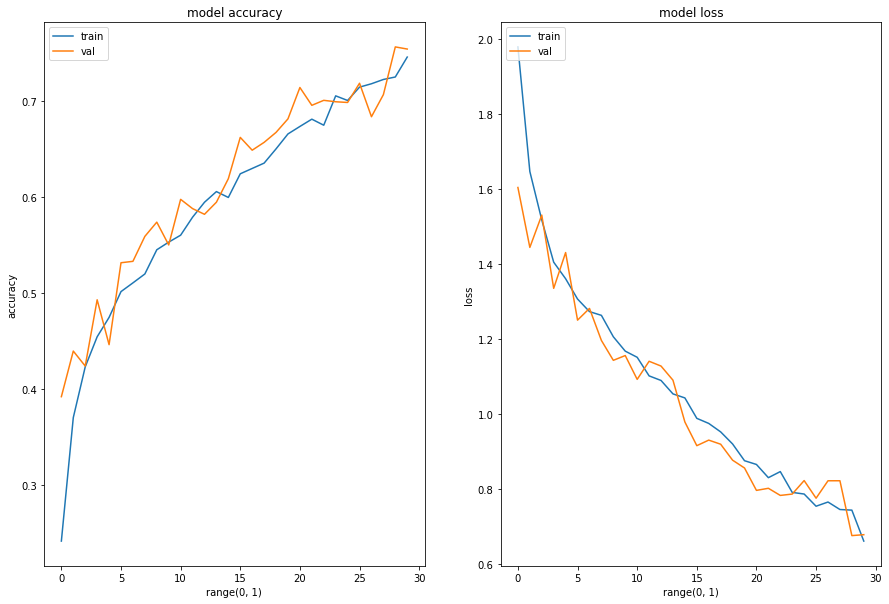

In [53]:
# Plot the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Inference: 
- Test & Validation `Accuracy` is improving over Epochs
- `Loss` is also significantly reduced


#### Since the Accuracy is improving on Validation with lesser Loss, re-training the model ith `additional` `15 Epochs` from the `Checkpoint`

In [54]:
# Train the model
epochs = 15
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs,callbacks=[checkpoint,earlystop])

Epoch 1/15
169/169 [==============================] - ETA: 0s - loss: 0.6652 - accuracy: 0.7463
Epoch 1: val_accuracy did not improve from 0.75650
169/169 [==============================] - 9s 55ms/step - loss: 0.6652 - accuracy: 0.7463 - val_loss: 0.8666 - val_accuracy: 0.6941
Epoch 2/15
168/169 [============================>.] - ETA: 0s - loss: 0.7069 - accuracy: 0.7392
Epoch 2: val_accuracy did not improve from 0.75650
169/169 [==============================] - 9s 54ms/step - loss: 0.7063 - accuracy: 0.7389 - val_loss: 0.7154 - val_accuracy: 0.7483
Epoch 3/15
169/169 [==============================] - ETA: 0s - loss: 0.6528 - accuracy: 0.7559
Epoch 3: val_accuracy improved from 0.75650 to 0.75724, saving model to model_2.h5
169/169 [==============================] - 9s 56ms/step - loss: 0.6528 - accuracy: 0.7559 - val_loss: 0.7475 - val_accuracy: 0.7572
Epoch 4/15
168/169 [============================>.] - ETA: 0s - loss: 0.6739 - accuracy: 0.7526
Epoch 4: val_accuracy improved from

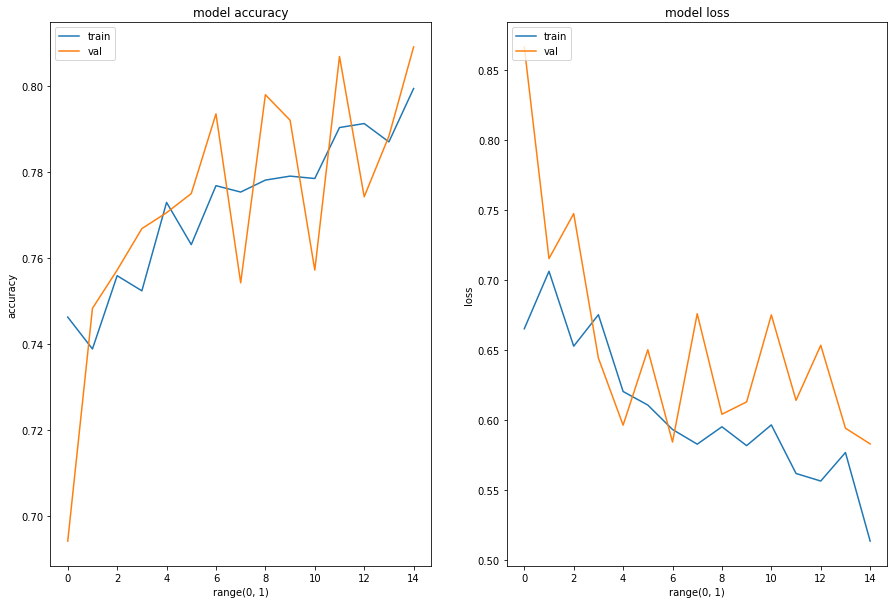

In [55]:
# Plot the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Summary & Conclusion

In `Train` Set: Below have fewer images with respect to other types
- Actinic keratosis
- Dermatofibroma
- Seborrheic keratosis
- Vascular lesion

In `Test` Set: Below have fewer images with respect to other types
- Seborrheic keratosis
- Vascular lesion

`Pigmented benign keratosis` has the dominant data

The Data had `Imbalance` and after handling the imbalance along with `Drop outs`, `Data Augmentation`, the Validation `Accuracy improved` and the `Loss decreased`.

Increasing the number of Epochs on the last model is increasing the Accuracy and reducing the loss further `without over fitting`